In [11]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
#import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import healpy        as hp
import handling_data as hdata
import noise_functions as fnoise
import pandas as pd

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.lines import Line2D
#from matplotlib.patches import Patch
#from matplotlib.markers import MarkerStyle
#from matplotlib.transforms import Affine2D
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
colors = ['darkgrey', '#0000ff', '#ff0000', '#0000FF',  '#FF0000', '#069AF3', '#00008B','#C79FEF','#DC143C','#C875C4','#9A0EEA','darkorange','#C79FEF','#7E1E9C','silver','#FF7F50','#FC5A50',
          '#FFA500','#F97306','#FFD700','#DDA0DD','#00008B','#069AF3','#0000FF','#00FFFF','#13EAC9','#7FFFD4','#04D8B2','#40E0D0']
my_cmap = ListedColormap(colors, name="my_cmap")#mpl.cm.Dark2#.reversed()#
#my_cmap_r = my_cmap.reversed()
font_dict = {'family': 'serif', 'color':  None,  'weight': 'bold','size': 30}
#############################################
## NAMASTER (https://namaster.readthedocs.io/en/latest/)
import pymaster as nmt
del_l  = 20
nside  = 256
##############################
b    = nmt.NmtBin.from_nside_linear(nside, nlb=del_l)
leff = b.get_effective_ells()
feff = leff*(leff+1)/2/np.pi

# LOW-Z

In [12]:
#########################################
### THEORETICAL
nside  = 256
prefix = 'lowz'
suffix = 'nch30_980_1260'
savename ='_'.join(( prefix,suffix ))
##########################################
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
#########################################
clcx = np.loadtxt(filepath_cross ).T[1:,:] 
nch  = int(clcx.shape[0])

In [13]:
prefix = 'lowz_nch30_980_1260_nch25_30'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej  = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"

    cl_f1_rec           = np.loadtxt(os.path.join(dirpath_rec  , L0_dir, 'cl_field1_rec.txt')).T[1:,:]
    cl_f1_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field1_sim.txt')).T[1:,:]
    cl_f2_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field2_sim.txt')).T[1:,:]    
    cl_cx_f1_f2_sim_sim = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_f1_f2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]

    if not i:
        CLs_dict_gal = {ICs: {'cl_f2_sim':cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                              'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                              'cl_f1_rec':cl_f1_rec, 
                             'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
                   }
    else:
        CLs_dict_gal[ICs] = {'cl_f2_sim': cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                         'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                         'cl_f1_rec': cl_f1_rec, 
                         'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
    del cl_f2_sim, cl_f1_rec, cl_cx_f1_f2_sim_sim, cl_cx_f1_f2_rec_sim, cl_f1_sim

prefix = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"

    cl_f1_rec           = np.loadtxt(os.path.join(dirpath_rec  , L0_dir, 'cl_field1_rec.txt')).T[1:,:]
    cl_f1_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field1_sim.txt')).T[1:,:]
    cl_f2_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field2_sim.txt')).T[1:,:]    
    cl_cx_f1_f2_sim_sim = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_f1_f2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]

    if not i:
        CLs_dict_cmb = {ICs: {'cl_f2_sim':cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                              'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                              'cl_f1_rec':cl_f1_rec, 
                             'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
                   }
    else:
        CLs_dict_cmb[ICs] = {'cl_f2_sim': cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                         'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                         'cl_f1_rec': cl_f1_rec, 
                         'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
    del cl_f2_sim, cl_f1_rec, cl_cx_f1_f2_sim_sim, cl_cx_f1_f2_rec_sim, cl_f1_sim
print('Processing time: {0:.4f} seg'.format(time.time()-timej))    

Processing time: 0.0353 seg


In [14]:
def leakage_theorectical(CLs_dict_=None,ins_=None, clcx_=None, bins_=None, calculate=False):
    if calculate:
        Wfg_sim0         = dcopy(CLs_dict_[ins_]['W_fg_rec'])
        clcx_th          = np.zeros_like(clcx)
        cl_cx_lkg_th_gal = np.zeros_like(clcx)
        cl_cx_lkg_th_cmb = np.zeros_like(clcx)
        clcx_th[bins_,:] = dcopy(clcx[bins_,:])
        for j in np.arange(0,nch,1):
            cl_cx_lkg_th_gal[j] = np.dot(Wfg_sim0[j,:], clcx_th[:,:])
            cl_cx_lkg_th_cmb[j] = np.dot(Wfg_sim0[j,:], clcx[:,:]   ) 
    else:
        path='/data/AMARINS/CMBWLxHI-DATA/leakage/fullsky/lowz_nch30_980_1260_nch25_30/{}/'.format(ins_)
        cl_cx_lkg_th_gal=np.loadtxt(os.path.join(path,'leakage_theory.txt')).T
        path='/data/AMARINS/CMBWLxHI-DATA/leakage/fullsky/lowz_nch30_980_1260/{}/'.format(ins_)
        cl_cx_lkg_th_cmb=np.loadtxt(os.path.join(path,'leakage_theory.txt')).T        
    return {'gal': cl_cx_lkg_th_gal,
            'cmb': cl_cx_lkg_th_cmb}

In [15]:
###########################################################################################
######## NOISE
### LOW-Z 
dirpath  = "/data/AMARINS/MAPS/WN256"
filename = "WN_None_256_980mhz1260mhz_30bins_full_L0001.fits"
WN_lowz = hdata.getmap(dirpath_=dirpath, filename_=filename, healpix_readingformat=False, hdu=1)
for j, jwn in enumerate(WN_lowz):
    Cl_wn_lowz = hp.anafast(jwn,pol=False) if not j else  np.vstack(( Cl_wn_lowz, hp.anafast(jwn,pol=False) ))
###########################################################################################
### CMB CONVERGENCE (CMB-S4)
path_cmbk = '/home/amarins/fullsky.xlsx'
Ncmbk_tab = pd.read_excel(path_cmbk, index_col=None, header=None) #[l, ((l(l+1))^2/2pi)Cl ]
Nkcmb = np.hstack((Ncmbk_tab[1].values[0],Ncmbk_tab[1].values[0],Ncmbk_tab[1].values))
lcmb = np.arange(Nkcmb.size)
###########################################################################################
### GAL CONVERGENCE (LSST)
nu_min = 24
nu_max = 29
bins   = np.arange(nu_min,nu_max+1)
sigma_eps_2 = 0.26
Nbins = bins.size 
ngal  = 27        #gal/arcmin2
Apix  = 5.49      #arcmin2
sigma2   = sigma_eps_2/(ngal/Apix/Nbins) #standard deviation ~ N(0,sgm)
WN_kappa = np.random.normal(scale = np.sqrt(sigma2), size=(Nbins,12*nside**2))
Nkgal    = np.zeros_like(Cl_wn_lowz)
kch=0
for jch in range(WN_lowz.shape[0]):
    if jch in bins:
        Nkgal[jch] = hp.anafast(WN_kappa[kch], pol=False)
        kch+=1
l=np.arange(Cl_wn_lowz[i].size)
#############################################################################################
######## BEAMS
blg_hi = fnoise.bl_function(40/60, input_unit="degree", from_real_space=False)[:-1]
blg_kcmb = fnoise.bl_function(10/60, input_unit="degree", from_real_space=False)[:-1]
blg_kgal = fnoise.bl_function(np.sqrt(5.49)/60, input_unit="degree", from_real_space=False)[:-1]

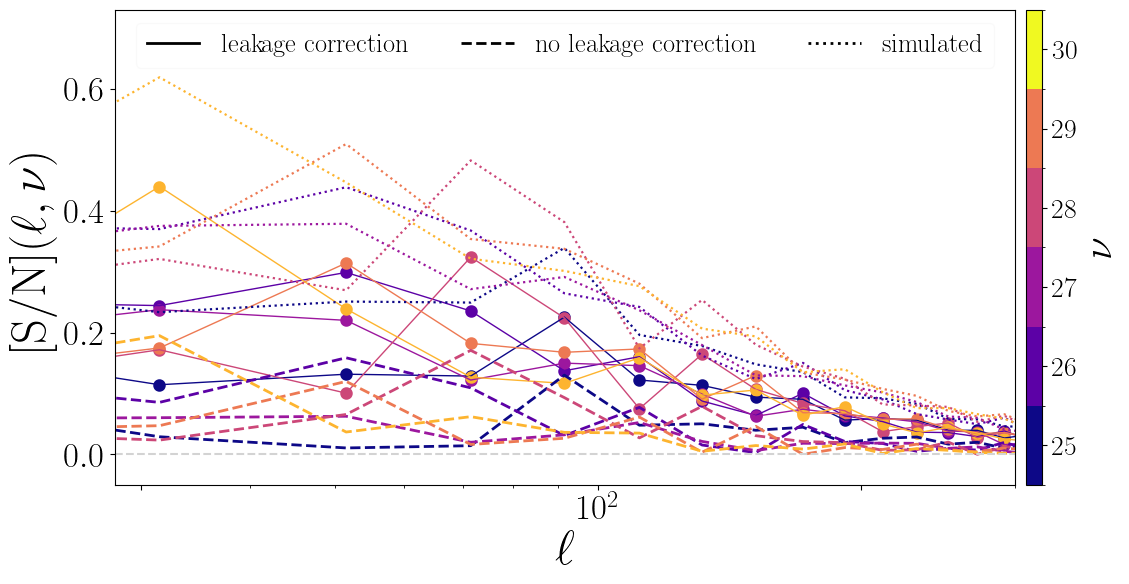

In [16]:
################ WITH CORRECTION
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.8,wspace=0.3, hspace=0.0)
###############
ins = 'ns3'
fsky=1
CLs_dict = dcopy(CLs_dict_gal)
Cl_wn = dcopy(Cl_wn_lowz)
cyticks = [ 0.0, 0.2, 0.4, 0.6]
cxticks = [30,100,200]
###############
c    = np.arange(0, 6)
cmap = plt.get_cmap("plasma", bins.size+1)
norm = mpl.colors.BoundaryNorm(np.arange(len(c)+1)+0.5,len(c)+1)
sm   = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 
############################################################
ax    = plt.subplot(grid[0,0])
for j, jch in enumerate(bins):
    #######################################
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins)    
    lkg         = b.bin_cell(LKG['gal'][jch])
    cx_rec      = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = ( cx_rec+lkg )**2/err_rec**2 
    ###############################
    plt.plot(    leff, np.sqrt(SN),             color=cmap(j), lw=1,) 
    plt.scatter( leff, np.sqrt(SN), marker='o', color=cmap(j), lw=3-0*j) 
#    ax.set_xscale('log'); ax.set_yscale('linear')
######################################################
for j, jch in enumerate(bins):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins)    
    lkg         = 0*b.bin_cell(LKG['gal'][jch])
    cx_rec      = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = ( cx_rec+lkg )**2/err_rec**2 
    ###############################
    plt.plot(    leff, np.sqrt(SN),             color=cmap(j), lw=2, ls='dashed') 
    #plt.scatter( leff, np.sqrt(SN), marker='o', color=cmap(j), lw=6-0.5*j) 
#    ax.set_xscale('log'); ax.set_yscale('linear')
######################################################
for j, jch in enumerate(bins):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins)    
    lkg         = b.bin_cell(LKG['gal'][jch])
    cx_rec      = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])#+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = ( cx_rec+lkg )**2/err_rec**2 
    ###############################
    plt.plot(    leff, np.sqrt(SN),             color=cmap(j), lw=1.6, ls=':') 
    #plt.scatter( leff, np.sqrt(SN), marker='o', color=cmap(j), lw=6-0.5*j) 
ax.set_xscale('log'); ax.set_yscale('linear')
ax.axhline(y=0, ls='dashed', color='lightgrey')
######################################################
ax.set_xlabel(r"$\ell$" , fontsize=35)
ax.set_ylabel(r"$[\textrm{S/N}](\ell,\nu)$" , fontsize=35)
ax.tick_params(axis='y', labelsize=25)#labelcolor='indigo',         
ax.tick_params(axis='x', labelsize=25)  
ax.set_ylim(-0.05,0.73)
ax.set_xlim(28,300)
ax.set_yticks(cyticks)
ax.set_xticks(cxticks)

###########################################################
cticks = np.linspace(0, bins.size, 6, dtype=np.int8)
cbar   = fig.colorbar(sm,ax=ax, ticks=c+1, pad=0.01, aspect=30)
cticks = np.array([r'${}$'.format(i+1) for i in bins])#np.hstack((bins,30))])
cbar.ax.set_yticklabels(cticks)
cbar.set_label(label=r'$\nu$',size=30)#,weight='bold');
###########################################################
custom_lines = [Line2D([0], [0], color='black', lw=2, ls='solid'),
                Line2D([0], [0], color='black', lw=2, ls='dashed'),
                Line2D([0], [0], color='black', lw=2, ls='dotted')]
#
ax.legend(custom_lines, [r'$\textrm{leakage correction}$', 
                         r'$\textrm{no leakage correction}$',
                         r'$\textrm{simulated}$'],
         fontsize=19,ncols=3,loc='upper center',framealpha=0.1)
#if 1: plt.savefig(os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( savename,'.'.join(('SN_comparison','png')) )) ), dpi=100, bbox_inches='tight')
#os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( savename,'.'.join(('SN_comparison','png')) )) )

In [48]:
colors = ['#0000ff', '#ff0000','#9A0EEA','darkorange','#C79FEF','#7E1E9C','silver','#FF7F50','#FC5A50',
          '#FFA500','#F97306','#FFD700','#DDA0DD','#00008B','#069AF3','#0000FF','#00FFFF','#13EAC9','#7FFFD4','#04D8B2','#40E0D0']
my_cmap = ListedColormap(colors, name="my_cmap")#mpl.cm.Dark2#.reversed()#

'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050_SN_comparison_24.png'

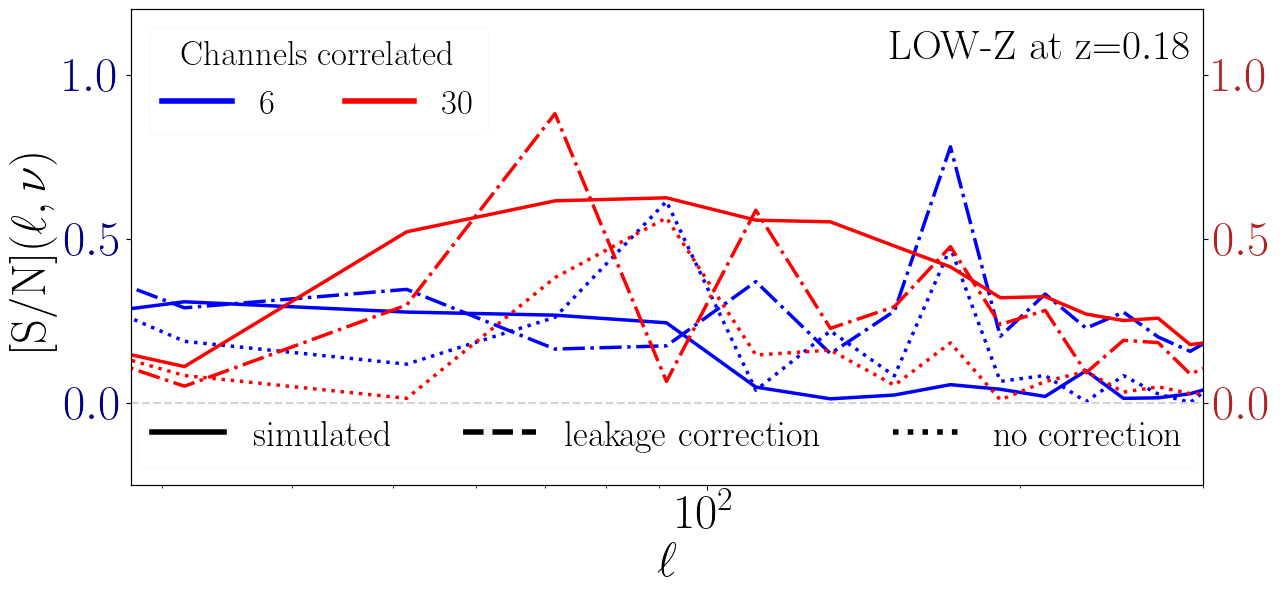

In [49]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.8,wspace=0.3, hspace=0.0)
ax1   = plt.subplot(grid[0,0])
############################################################################################################
savefigs=True
ins = 'ns3'
fsky=1
CLs_dict = dcopy(CLs_dict_gal)
Cl_wn = dcopy(Cl_wn_lowz)
cyticks = [ 0.0, 0.2, 0.4, 0.6]
cxticks = [30,100,200]
bins_plot = [24]#,29]
lkg_field = 'gal'
jj=0
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='solid') 
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='-.') 
ax1.set_xscale('log'); ax.set_yscale('linear')

######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls=':') 
ax1.set_xscale('log'); ax.set_yscale('linear')
############################################################################################################
############################################################################################################
############################################################################################################
CLs_dict = dcopy(CLs_dict_cmb)
Cl_wn = dcopy(Cl_wn_lowz)
zeff     = cxft.get_zeff(numin =980, numax =1260, nbands= 30, n_curves=30)['zeff'][bins_plot[0]]
ax2 = ax1.twinx()  
lkg_field = 'cmb'
jj=1
###################################################### SIMULATED
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='solid') 
###################################################### CORRECTED
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='-.') 
ax2.set_xscale('log'); ax.set_yscale('linear')

###################################################### NO CORR
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls=':') 
ax2.set_xscale('log'); ax.set_yscale('linear')

ax1.axhline(y=0, ls='dashed', color='lightgrey')
ax1.set_xlabel(r"$\ell$" , fontsize=35)
ax1.set_ylabel(r"$[\textrm{S/N}](\ell,\nu)$" , fontsize=35)
ax1.tick_params(axis='y', labelsize=35,labelcolor='navy')    
ax1.tick_params(axis='x', labelsize=35)    
ax2.tick_params(axis='both', labelsize=35,labelcolor='firebrick'),    
#ax1.tick_params(axis='x', labelsize=25)  
ax1.set_ylim(-0.25,1.2)
ax2.set_ylim(-0.25,1.2)
ax1.set_xlim(28,300)
#ax1.set_xticks([30, 90, 200])
#ax1.set_yticks([0,0.2,0.4])
#ax2.set_yticks([0,0.3,0.6,0.9])

###########################################################
custom_lines = [Line2D([0], [0], color='black', lw=4, ls='solid'),
                Line2D([0], [0], color='black', lw=4, ls='dashed'),
                Line2D([0], [0], color='black', lw=4, ls='dotted')]
#
legend_1= ax1.legend(custom_lines, [r'$\textrm{simulated}$', 
                                   r'$\textrm{leakage correction}$',
                                   r'$\textrm{no correction}$'],
                    fontsize=26,ncols=3,loc='lower center',framealpha=0.1)
###########################################################
ax1.add_artist(legend_1)
custom_lines = [Line2D([0], [0], color='blue', lw=4, ls='solid'),
                Line2D([0], [0], color='red' , lw=4, ls='solid')]
#
legend_2= ax1.legend(custom_lines, [r'${}$'.format(6), 
                                    r'${}$'.format(30)],
                    fontsize=25,ncols=3,loc='upper left',framealpha=0.1, title=r'$\textrm{Channels correlated}$', title_fontsize=25)
###########################################################
ax2.text(x=300-150, y=1.05, s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname =os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( prefix,'.'.join(('SN_comparison_'+str(jch),'png')) )) )
#if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050_SN_comparison_24.png'

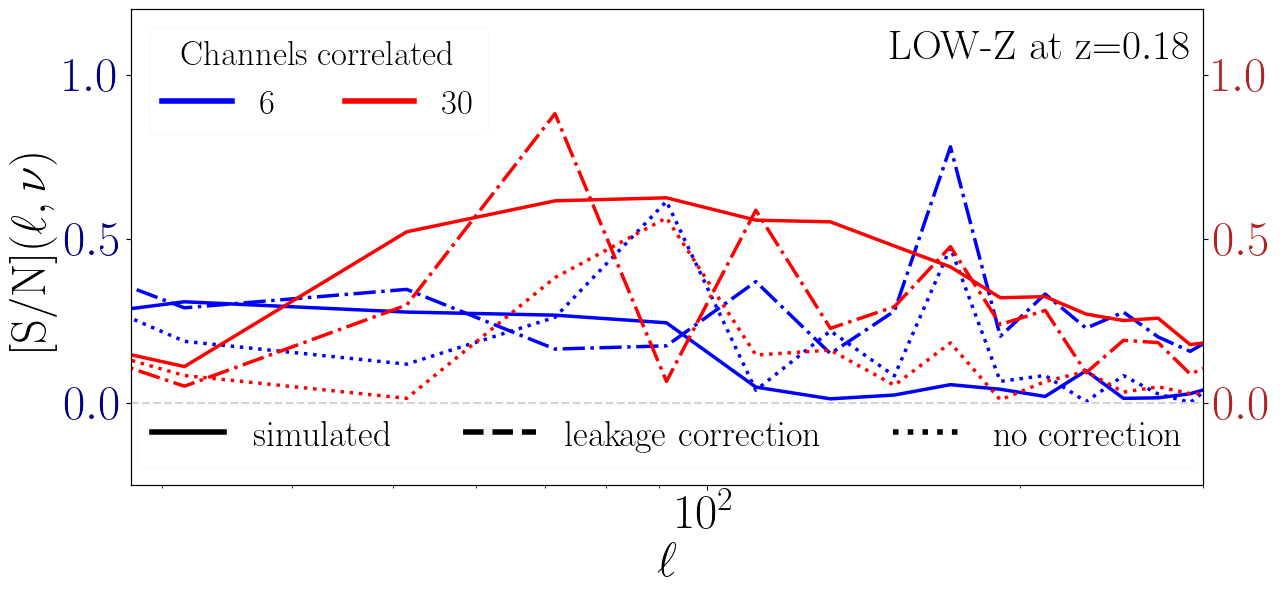

In [47]:
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.8,wspace=0.3, hspace=0.0)
ax1   = plt.subplot(grid[0,0])
############################################################################################################
savefigs=True
ins = 'ns3'
fsky=1
CLs_dict = dcopy(CLs_dict_gal)
Cl_wn = dcopy(Cl_wn_lowz)
cyticks = [ 0.0, 0.2, 0.4, 0.6]
cxticks = [30,100,200]
bins_plot = [24]#,29]
lkg_field = 'gal'
jj=0
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='solid') 
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='-.') 
ax1.set_xscale('log'); ax.set_yscale('linear')

######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls=':') 
ax1.set_xscale('log'); ax.set_yscale('linear')
############################################################################################################
############################################################################################################
############################################################################################################
CLs_dict = dcopy(CLs_dict_cmb)
Cl_wn = dcopy(Cl_wn_lowz)
zeff     = cxft.get_zeff(numin =980, numax =1260, nbands= 30, n_curves=30)['zeff'][bins_plot[0]]
ax2 = ax1.twinx()  
lkg_field = 'cmb'
jj=1
###################################################### SIMULATED
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='solid') 
###################################################### CORRECTED
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = b.bin_cell(LKG[lkg_field ][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls='-.') 
ax2.set_xscale('log'); ax.set_yscale('linear')

###################################################### NO CORR
for j, jch in enumerate(bins_plot):
    LKG = leakage_theorectical(CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG[lkg_field][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(jj), lw=2.5, ls=':') 
ax2.set_xscale('log'); ax.set_yscale('linear')

ax1.axhline(y=0, ls='dashed', color='lightgrey')
ax1.set_xlabel(r"$\ell$" , fontsize=35)
ax1.set_ylabel(r"$[\textrm{S/N}](\ell,\nu)$" , fontsize=35)
ax1.tick_params(axis='y', labelsize=35,labelcolor='navy')    
ax1.tick_params(axis='x', labelsize=35)    
ax2.tick_params(axis='both', labelsize=35,labelcolor='firebrick'),    
#ax1.tick_params(axis='x', labelsize=25)  
ax1.set_ylim(-0.25,1.2)
ax2.set_ylim(-0.25,1.2)
ax1.set_xlim(28,300)
#ax1.set_xticks([30, 90, 200])
#ax1.set_yticks([0,0.2,0.4])
#ax2.set_yticks([0,0.3,0.6,0.9])

###########################################################
custom_lines = [Line2D([0], [0], color='black', lw=4, ls='solid'),
                Line2D([0], [0], color='black', lw=4, ls='dashed'),
                Line2D([0], [0], color='black', lw=4, ls='dotted')]
#
legend_1= ax1.legend(custom_lines, [r'$\textrm{simulated}$', 
                                   r'$\textrm{leakage correction}$',
                                   r'$\textrm{no correction}$'],
                    fontsize=26,ncols=3,loc='lower center',framealpha=0.1)
###########################################################
ax1.add_artist(legend_1)
custom_lines = [Line2D([0], [0], color='blue', lw=4, ls='solid'),
                Line2D([0], [0], color='red' , lw=4, ls='solid')]
#
legend_2= ax1.legend(custom_lines, [r'${}$'.format(6), 
                                    r'${}$'.format(30)],
                    fontsize=25,ncols=3,loc='upper left',framealpha=0.1, title=r'$\textrm{Channels correlated}$', title_fontsize=25)
###########################################################
ax2.text(x=300-150, y=1.05, s=r'$\textrm{LOW-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname =os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( prefix,'.'.join(('SN_comparison_'+str(jch),'png')) )) )
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

## HIGH-Z

In [21]:
#########################################
### THEORETICAL
nside  = 256
prefix = 'highz'
suffix = 'nch70_350_1050'
savename ='_'.join(( prefix,suffix ))
##########################################
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
#########################################
clcx = np.loadtxt(filepath_cross ).T[1:,:] 
nch  = int(clcx.shape[0])

In [22]:
prefix = 'highz_nch70_350_1050_nch65_70'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
timej  = time.time() 
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"

    cl_f1_rec           = np.loadtxt(os.path.join(dirpath_rec  , L0_dir, 'cl_field1_rec.txt')).T[1:,:]
    cl_f1_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field1_sim.txt')).T[1:,:]
    cl_f2_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field2_sim.txt')).T[1:,:]    
    cl_cx_f1_f2_sim_sim = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_f1_f2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]

    if not i:
        CLs_dict_gal = {ICs: {'cl_f2_sim':cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                              'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                              'cl_f1_rec':cl_f1_rec, 
                             'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
                   }
    else:
        CLs_dict_gal[ICs] = {'cl_f2_sim': cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                         'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                         'cl_f1_rec': cl_f1_rec, 
                         'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
    del cl_f2_sim, cl_f1_rec, cl_cx_f1_f2_sim_sim, cl_cx_f1_f2_rec_sim, cl_f1_sim

prefix = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_sims   = os.path.join(dirpath_out_ns,'simulations')
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    dirpath_lkg    = os.path.join(dirpath_out_ns,'leakage')
    dirpath_cross  = os.path.join(dirpath_out_ns,'cross')
    dirpath_alpha  = os.path.join(dirpath_out_ns,'alpha')
    L0_dir         = "sim0"

    cl_f1_rec           = np.loadtxt(os.path.join(dirpath_rec  , L0_dir, 'cl_field1_rec.txt')).T[1:,:]
    cl_f1_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field1_sim.txt')).T[1:,:]
    cl_f2_sim           = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_field2_sim.txt')).T[1:,:]    
    cl_cx_f1_f2_sim_sim = np.loadtxt(os.path.join(dirpath_sims , L0_dir, 'cl_cx_field1_field2_sim_sim.txt')).T[1:,:]
    cl_cx_f1_f2_rec_sim = np.loadtxt(os.path.join(dirpath_cross, L0_dir, 'cl_cx_field1_field2_rec_sim.txt')).T[1:,:]

    if not i:
        CLs_dict_cmb = {ICs: {'cl_f2_sim':cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                              'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                              'cl_f1_rec':cl_f1_rec, 
                             'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
                   }
    else:
        CLs_dict_cmb[ICs] = {'cl_f2_sim': cl_f2_sim,'cl_f1_sim':cl_f1_sim,
                         'cl_cx_f1_f2_sim_sim':cl_cx_f1_f2_sim_sim,
                         'cl_f1_rec': cl_f1_rec, 
                         'cl_cx_f1_f2_rec_sim':cl_cx_f1_f2_rec_sim
                         }
    del cl_f2_sim, cl_f1_rec, cl_cx_f1_f2_sim_sim, cl_cx_f1_f2_rec_sim, cl_f1_sim
print('Processing time: {0:.4f} seg'.format(time.time()-timej))    

Processing time: 0.0803 seg


In [23]:
def leakage_simulated(ins_=None):
    path='/data/AMARINS/CMBWLxHI-DATA/leakage/fullsky/highz_nch70_350_1050_nch65_70/{}/'.format(ins_)
    cl_cx_lkg_sim_gal=np.loadtxt(os.path.join(path,'leakage_sim.txt')).T
    path='/data/AMARINS/CMBWLxHI-DATA/leakage/fullsky/highz_nch70_350_1050/{}/'.format(ins_)
    cl_cx_lkg_sim_cmb=np.loadtxt(os.path.join(path,'leakage_sim.txt')).T        
    return {'gal': cl_cx_lkg_sim_gal,
            'cmb': cl_cx_lkg_sim_cmb}

In [24]:
###########################################################################################
######## NOISE
### HIGH-Z 
output_info = {'field':'WN', 
               "frequency":{"min":350,"max":1050,'nbands':70},
               "coverage":'full',
               "apply_beam":False,               
               'beam': {'model':None, 'fwhm':0}, 
               'stokes':None,
               "freq_unit":"MHz", "stokes_unit":"mk", "fwhm_unit":"arcmin",
               'nside':256,
               "realization":1,
               "output_dir":'/data/AMARINS/MAPS/WN256',
               "clear_output_dir":False,
               "apply_mask":False,
               "pathmask":'/data/AMARINS/`MAPS/M256',
               "savedata_hdu" : 1}
nu_vec_highz = hdata.nu_bins_vector(numin_ =output_info['frequency']['min'], 
                                    numax_ =output_info['frequency']['max'], 
                                   nbands_=output_info['frequency']['nbands'])['nu']
nuvec_highz_eff = np.array([ 0.5*(nu_vec_highz[i]+nu_vec_highz[i+1]) for i in range(nu_vec_highz.size-1) ])
for jch in range(nuvec_highz_eff.size):
    sigma_info = {'nside' :output_info['nside'],
                  'nbeams':425,#int(197*(64800/30000))
                  'Osur'  :64800,#5324,
                  'Obeam' :4,
                  'tsur'  :1,
                  'K'     :1,#2**(1/2),
                  'fsky'  :1,#0.13,
                  'dcycle':1}#0.9}    
    sigma_info['nch']   =70
    sigma_info['nu_min']=nu_vec_highz[jch]
    sigma_info['nu_max']=nu_vec_highz[jch+1]
    sigma_info['nu_eff']=nuvec_highz_eff[jch] 
    sigma_info['Tsys']=fnoise.Tsys_SKA_MID_band1(nuvec_highz_eff[jch])#K
    gnoise = hdata.get_noise_level(sigma_info)
    jwn = np.random.normal(scale = gnoise['sigmaN'], size=(1,12*sigma_info['nside']**2))
    cl_jwn = hp.anafast(jwn,pol=False)
    WN_highz = jwn if not jch else np.vstack(( WN_highz,jwn ))
    Cl_wn_highz  = cl_jwn if not jch else np.vstack(( Cl_wn_highz,cl_jwn ))
    del jwn, cl_jwn    
###########################################################################################
### CMB CONVERGENCE (CMB-S4)
path_cmbk = '/home/amarins/fullsky.xlsx'
Ncmbk_tab = pd.read_excel(path_cmbk, index_col=None, header=None) #[l, ((l(l+1))^2/2pi)Cl ]
Nkcmb = np.hstack((Ncmbk_tab[1].values[0],Ncmbk_tab[1].values[0],Ncmbk_tab[1].values))
lcmb = np.arange(Nkcmb.size)
###########################################################################################
### GAL CONVERGENCE (LSST)
nu_min = 64
nu_max = 69
bins   = np.arange(nu_min,nu_max+1)
sigma_eps_2 = 0.26
Nbins = bins.size 
ngal  = 27        #gal/arcmin2
Apix  = 5.49      #arcmin2
sigma2   = sigma_eps_2/(ngal/Apix/Nbins) #standard deviation ~ N(0,sgm)
WN_kappa = np.random.normal(scale = np.sqrt(sigma2), size=(Nbins,12*nside**2))
Nkgal    = np.zeros_like(Cl_wn_highz)
kch=0
for jch in range(WN_highz.shape[0]):
    if jch in bins:
        Nkgal[jch] = hp.anafast(WN_kappa[kch], pol=False)
        kch+=1
l=np.arange(Cl_wn_lowz[0].size)
#############################################################################################
######## BEAMS
blg_hi = fnoise.bl_function(40/60, input_unit="degree", from_real_space=False)[:-1]
#blg_ck = fnoise.bl_function(10/60, input_unit="degree", from_real_space=False)[:-1]
blg_kgal = fnoise.bl_function(np.sqrt(5.49)/60, input_unit="degree", from_real_space=False)[:-1]

'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050_SN_comparison_64.png'

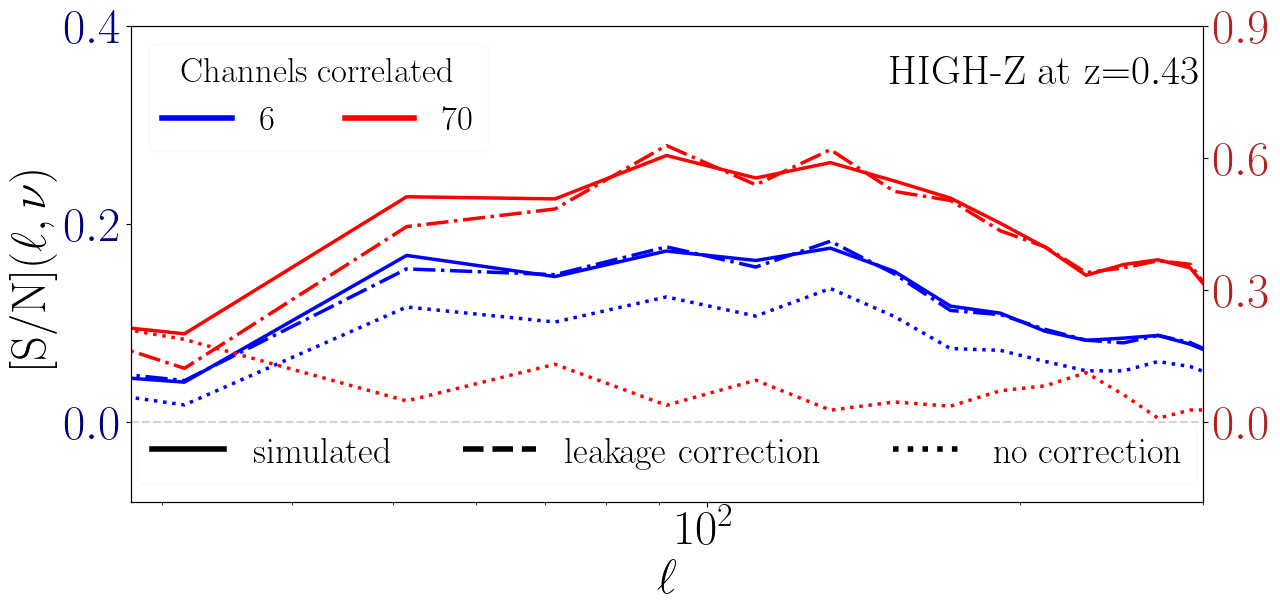

In [25]:
################ WITH CORRECTION
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.8,wspace=0.3, hspace=0.0)
ax1   = plt.subplot(grid[0,0])
############################################################################################################
############################################################################################################
############################################################################################################
savefigs=True
ins = 'ns4'
fsky=1
CLs_dict = dcopy(CLs_dict_gal)
Cl_wn = dcopy(Cl_wn_highz)
cyticks = [ 0.0, 0.2, 0.4, 0.6]
cxticks = [30,100,200]
bins_plot = [64]#,29]
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)     
    lkg         = 0*b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls='solid') 
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)     
    lkg         = b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls='-.') 
ax1.set_xscale('log'); ax.set_yscale('linear')

######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls=':') 
ax1.set_xscale('log'); ax.set_yscale('linear')
############################################################################################################
############################################################################################################
############################################################################################################
CLs_dict = dcopy(CLs_dict_cmb)
Cl_wn = dcopy(Cl_wn_highz)
zeff     = cxft.get_zeff(numin =350, numax =1050, nbands= 70, n_curves=70)['zeff'][bins_plot[0]]
ax2 = ax1.twinx()  
###################################################### SIMULATED
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls='solid') 
###################################################### CORRECTED
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)      
    lkg         = b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls='-.') 
ax2.set_xscale('log'); ax.set_yscale('linear')

###################################################### NO CORR
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls=':') 
ax2.set_xscale('log'); ax.set_yscale('linear')

ax1.axhline(y=0, ls='dashed', color='lightgrey')
ax1.set_xlabel(r"$\ell$" , fontsize=35)
ax1.set_ylabel(r"$[\textrm{S/N}](\ell,\nu)$" , fontsize=35)
ax1.tick_params(axis='y', labelsize=35,labelcolor='navy')    
ax1.tick_params(axis='x', labelsize=35)    
ax2.tick_params(axis='both', labelsize=35,labelcolor='firebrick'),    
#ax1.tick_params(axis='x', labelsize=25)  
ax1.set_ylim(-0.08,0.4)
ax2.set_ylim(-0.18,0.9)
ax1.set_xlim(28,300)
#ax1.set_xticks([30, 90, 200])
ax1.set_yticks([0,0.2,0.4])
ax2.set_yticks([0,0.3,0.6,0.9])

###########################################################
custom_lines = [Line2D([0], [0], color='black', lw=4, ls='solid'),
                Line2D([0], [0], color='black', lw=4, ls='dashed'),
                Line2D([0], [0], color='black', lw=4, ls='dotted')]
#
legend_1= ax1.legend(custom_lines, [r'$\textrm{simulated}$', 
                                   r'$\textrm{leakage correction}$',
                                   r'$\textrm{no correction}$'],
                    fontsize=26,ncols=3,loc='lower center',framealpha=0.1)
###########################################################
ax1.add_artist(legend_1)
custom_lines = [Line2D([0], [0], color='blue', lw=4, ls='solid'),
                Line2D([0], [0], color='red' , lw=4, ls='solid')]
#
legend_2= ax1.legend(custom_lines, [r'${}$'.format(6), 
                                   r'${}$'.format(70)],
                    fontsize=25,ncols=3,loc='upper left',framealpha=0.1, title=r'$\textrm{Channels correlated}$', title_fontsize=25)
###########################################################
ax2.text(x=300-150, y=0.77, s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname =os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( prefix,'.'.join(('SN_comparison_'+str(jch),'png')) )) )
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/highz_nch70_350_1050_SN_comparison_69.png'

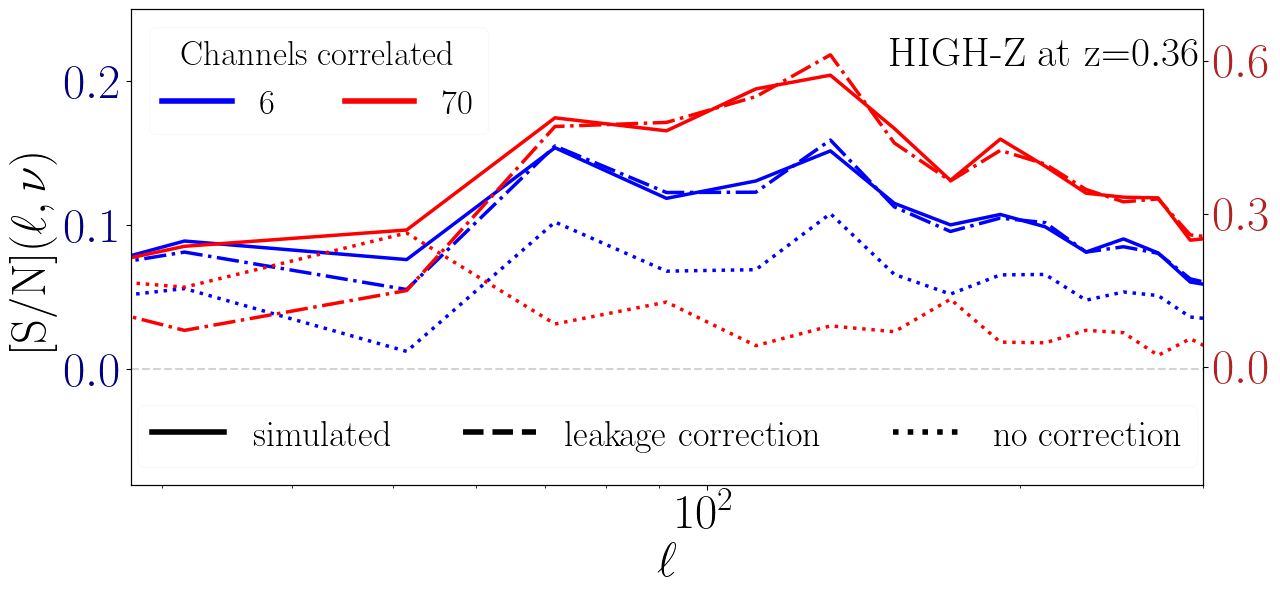

In [26]:
################ WITH CORRECTION
fig   = plt.figure()
grid  = plt.GridSpec(1,1,top=1.1,right=1.8,wspace=0.3, hspace=0.0)
ax1   = plt.subplot(grid[0,0])
############################################################################################################
############################################################################################################
############################################################################################################
savefigs=True
ins = 'ns4'
fsky=1
CLs_dict = dcopy(CLs_dict_gal)
Cl_wn = dcopy(Cl_wn_highz)
cyticks = [ 0.0, 0.2, 0.4, 0.6]
cxticks = [30,100,200]
bins_plot = [69]#,29]
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)     
    lkg         = 0*b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls='solid') 
######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)     
    lkg         = b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls='-.') 
ax1.set_xscale('log'); ax.set_yscale('linear')

######################################################
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['gal'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkgal[jch]/(blg_kgal**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax1.plot(    leff, np.sqrt(SN),             color=my_cmap(j), lw=2.5, ls=':') 
ax1.set_xscale('log'); ax.set_yscale('linear')
############################################################################################################
############################################################################################################
############################################################################################################
CLs_dict = dcopy(CLs_dict_cmb)
Cl_wn = dcopy(Cl_wn_highz)
zeff     = cxft.get_zeff(numin =350, numax =1050, nbands= 70, n_curves=70)['zeff'][bins_plot[0]]
ax2 = ax1.twinx()  
###################################################### SIMULATED
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_sim_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_sim'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls='solid') 
###################################################### CORRECTED
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)      
    lkg         = b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls='-.') 
ax2.set_xscale('log'); ax.set_yscale('linear')

###################################################### NO CORR
for j, jch in enumerate(bins_plot):
    LKG = leakage_simulated(ins)#CLs_dict_=CLs_dict, ins_=ins, clcx_=clcx, bins_=bins_plot)    
    lkg         = 0*b.bin_cell(LKG['cmb'][jch])
    cx_rec_part = b.bin_cell(CLs_dict[ins]['cl_cx_f1_f2_rec_sim'][jch])+lkg
    c1_rec_part = b.bin_cell(CLs_dict[ins]['cl_f1_rec'][jch]+  1*Cl_wn[jch]/(blg_hi**2))
    c2_sim_part = b.bin_cell(CLs_dict[ins]['cl_f2_sim'][0]  +  1*Nkcmb[jch]/(blg_kcmb**2)    )
    err_rec     = np.sqrt( cx_rec_part**2   + c1_rec_part*c2_sim_part  )
    err_rec     = err_rec/np.sqrt( (2*leff+1)*fsky*del_l )
    SN = cx_rec_part**2/err_rec**2 
    ax2.plot(    leff, np.sqrt(SN),             color=my_cmap(j+1), lw=2.5, ls=':') 
ax2.set_xscale('log'); ax.set_yscale('linear')

ax1.axhline(y=0, ls='dashed', color='lightgrey')
ax1.set_xlabel(r"$\ell$" , fontsize=35)
ax1.set_ylabel(r"$[\textrm{S/N}](\ell,\nu)$" , fontsize=35)
ax1.tick_params(axis='y', labelsize=35,labelcolor='navy')    
ax1.tick_params(axis='x', labelsize=35)    
ax2.tick_params(axis='both', labelsize=35,labelcolor='firebrick'),    
#ax1.tick_params(axis='x', labelsize=25)  
ax1.set_ylim(-0.08,0.25)
ax2.set_ylim(-0.23,0.7)
ax1.set_xlim(28,300)
#ax1.set_xticks([30, 90, 200])
ax1.set_yticks([0,0.1,0.2])
ax2.set_yticks([0,0.3,0.6])

###########################################################
custom_lines = [Line2D([0], [0], color='black', lw=4, ls='solid'),
                Line2D([0], [0], color='black', lw=4, ls='dashed'),
                Line2D([0], [0], color='black', lw=4, ls='dotted')]
#
legend_1= ax1.legend(custom_lines, [r'$\textrm{simulated}$', 
                                   r'$\textrm{leakage correction}$',
                                   r'$\textrm{no correction}$'],
                    fontsize=26,ncols=3,loc='lower center',framealpha=0.1)
###########################################################
ax1.add_artist(legend_1)
custom_lines = [Line2D([0], [0], color='blue', lw=4, ls='solid'),
                Line2D([0], [0], color='red' , lw=4, ls='solid')]
#
legend_2= ax1.legend(custom_lines, [r'${}$'.format(6), 
                                   r'${}$'.format(70)],
                    fontsize=25,ncols=3,loc='upper left',framealpha=0.1, title=r'$\textrm{Channels correlated}$', title_fontsize=25)
###########################################################
ax2.text(x=300-150, y=0.59, s=r'$\textrm{HIGH-Z at z=}$'+r'${}$'.format(zeff), fontdict=font_dict)
###########################################################
pathname =os.path.join( '/data/AMARINS/CMBWLxHI-CODES/images', '_'.join(( prefix,'.'.join(('SN_comparison_'+str(jch),'png')) )) )
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname